In [196]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import  mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats

In [197]:
df=pd.read_csv("train.csv")
print(df.info())
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [198]:
#This function shows summary of null values, unique value, Type of columns in summarized manner
def summaryDataSet():
    df2=pd.DataFrame({"dtypes":df.dtypes})
    df2['missing']=df.isnull().sum()
    df2["missing%"]=100* df.isnull().sum()/len(df)
    df2["unique_val"]=df.nunique()
    #df2.sort_values(by="missing", ascending=False).head()
    df3=df2[df2['missing']>0].sort_values(by='missing%',ascending=False)
    return df3

In [199]:
summaryDataSet()

,dtypes,missing,missing%,unique_val
PoolQC,object,1453,99.520548,3
MiscFeature,object,1406,96.301370,4
Alley,object,1369,93.767123,2
Fence,object,1179,80.753425,4
FireplaceQu,object,690,47.260274,5
LotFrontage,float64,259,17.739726,110
GarageType,object,81,5.547945,6
GarageYrBlt,float64,81,5.547945,97
GarageFinish,object,81,5.547945,3
GarageQual,object,81,5.547945,5


### Dropping Columns

In [200]:
# Dropping columns having missing values more than 80% and others not required for analysis like "Id".
drop_lst=["PoolQC","MiscFeature","Alley","Fence","Id"]
df.drop(drop_lst, axis=1, inplace=True)
df.shape

(1460, 76)

### Imputation of Null Value

In [201]:
# imputation Null value for df['MasVnrArea'] & df['GarageYrBlt'] by mean and -1 as the house has no Garage,
df['MasVnrArea'].fillna(df.MasVnrArea.mean(),inplace=True)
df['GarageYrBlt'].fillna(-1,inplace=True)
df['MasVnrType'].fillna(df['MasVnrType'].describe().loc['top'],inplace=True)
df['BsmtQual'].fillna(df['BsmtQual'].describe().loc['top'],inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].describe().loc['top'],inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].describe().loc['top'],inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].describe().loc['top'],inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].describe().loc['top'],inplace=True)
df['GarageType'].fillna(df['GarageType'].describe().loc['top'],inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].describe().loc['top'],inplace=True)
df['GarageQual'].fillna(df['GarageQual'].describe().loc['top'],inplace=True)
df['GarageCond'].fillna(df['GarageCond'].describe().loc['top'],inplace=True)
df['FireplaceQu'].fillna(df.FireplaceQu.describe().loc['top'],inplace=True)
df['Electrical'].fillna(df.Electrical.describe().loc['top'],inplace=True)
df['LotFrontage'].fillna(df.LotFrontage.median(),inplace=True)

In [202]:
summaryDataSet()

,dtypes,missing,missing%,unique_val


### Identifying categorical variables that follow some order and treating them as these are ordinal in nature

In [203]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head(3)

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [204]:
# Mapping with number
df['LandSlope'] = df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df['BsmtQual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df['BsmtCond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df['BsmtExposure'].map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df['CentralAir'].map({'N':0,'Y':1})
df['KitchenQual'] = df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df['GarageFinish'].map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df['GarageQual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df['GarageCond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [205]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head(3)

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0


### Data visualization

In [206]:
# List of all categoreical variables
all_obj_colm=[x for x in df.columns.tolist() if df[x].dtypes=="object"]

In [207]:
# List of all categoreical variables
all_cont_colm=[x for x in df.columns.tolist() if df[x].dtypes !="object"]

In [208]:
# correlation matix
crr=df.corr()
crr

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.119289,-0.025672,0.032628,-0.059316,0.027850,0.040581,0.022895,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,-0.138877,0.065603,0.234812,-0.053281,0.116685,0.083348,0.179042,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,-0.165315,0.436868,0.105806,-0.005636,0.014228,0.013788,0.103960,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
LotShape,0.119289,-0.138877,-0.165315,1.000000,-0.099951,-0.190497,0.013693,-0.226062,-0.153825,-0.105586,...,-0.166946,-0.075412,0.078213,-0.036459,-0.053054,-0.020051,-0.042061,-0.033455,0.036449,-0.255580
LandSlope,-0.025672,0.065603,0.436868,-0.099951,1.000000,-0.066450,0.010355,-0.073639,-0.059105,-0.021812,...,0.095156,-0.032622,-0.008843,0.008694,0.052976,-0.015505,-0.003518,0.007072,-0.002305,0.051152
OverallQual,0.032628,0.234812,0.105806,-0.190497,-0.066450,1.000000,-0.091932,0.572323,0.550684,0.410238,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,0.013693,0.010355,-0.091932,1.000000,-0.375983,0.073741,-0.127788,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,-0.226062,-0.073639,0.572323,-0.375983,1.000000,0.592855,0.314745,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,-0.153825,-0.059105,0.550684,0.073741,0.592855,1.000000,0.179186,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022895,0.179042,0.103960,-0.105586,-0.021812,0.410238,-0.127788,0.314745,0.179186,1.000000,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241


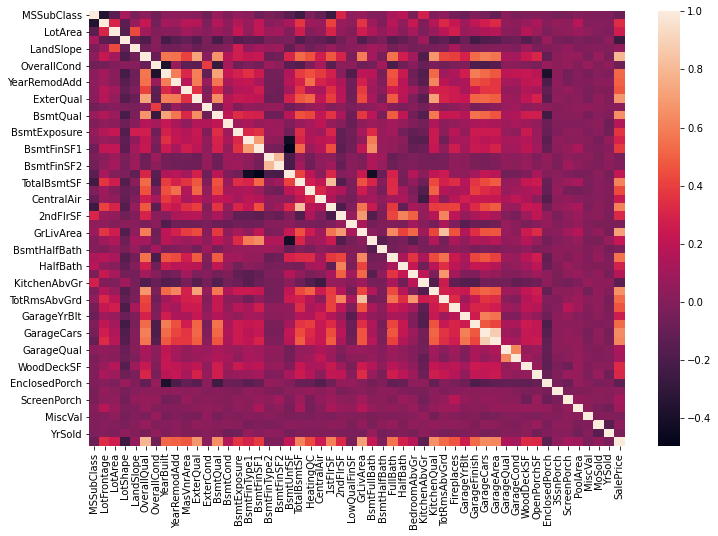

In [209]:
plt.figure(figsize=(12,8))
sns.heatmap(crr)

In [210]:
# Finding top 10 variables which are highly correlated with target variable (according to correlation matrix)
crr['dtypes']=df.dtypes
crr[['SalePrice',"dtypes"]].sort_values(by="SalePrice", ascending=False).head(50)
crr_lst=crr[['SalePrice',"dtypes"]].sort_values(by="SalePrice", ascending=False).head(20).index.tolist()
#lst2=lst2.remove('SalePrice')
crr_lst

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'ExterQual',
 'KitchenQual',
 'BsmtQual',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'GarageFinish',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'Fireplaces',
 'HeatingQC',
 'BsmtFinSF1',
 'BsmtExposure']

In [211]:
df[crr_lst].head()

,SalePrice,OverallQual,GrLivArea,ExterQual,KitchenQual,BsmtQual,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,GarageFinish,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,HeatingQC,BsmtFinSF1,BsmtExposure
0,208500,7,1710,3,3,4,2,548,856,856,2,2,8,2003,2003,196.0,0,4,706,1
1,181500,6,1262,2,2,4,2,460,1262,1262,2,2,6,1976,1976,0.0,1,4,978,4
2,223500,7,1786,3,3,4,2,608,920,920,2,2,6,2001,2002,162.0,1,4,486,2
3,140000,7,1717,2,3,3,3,642,756,961,1,1,7,1915,1970,0.0,1,3,216,1
4,250000,8,2198,3,3,4,3,836,1145,1145,2,2,9,2000,2000,350.0,1,4,655,3


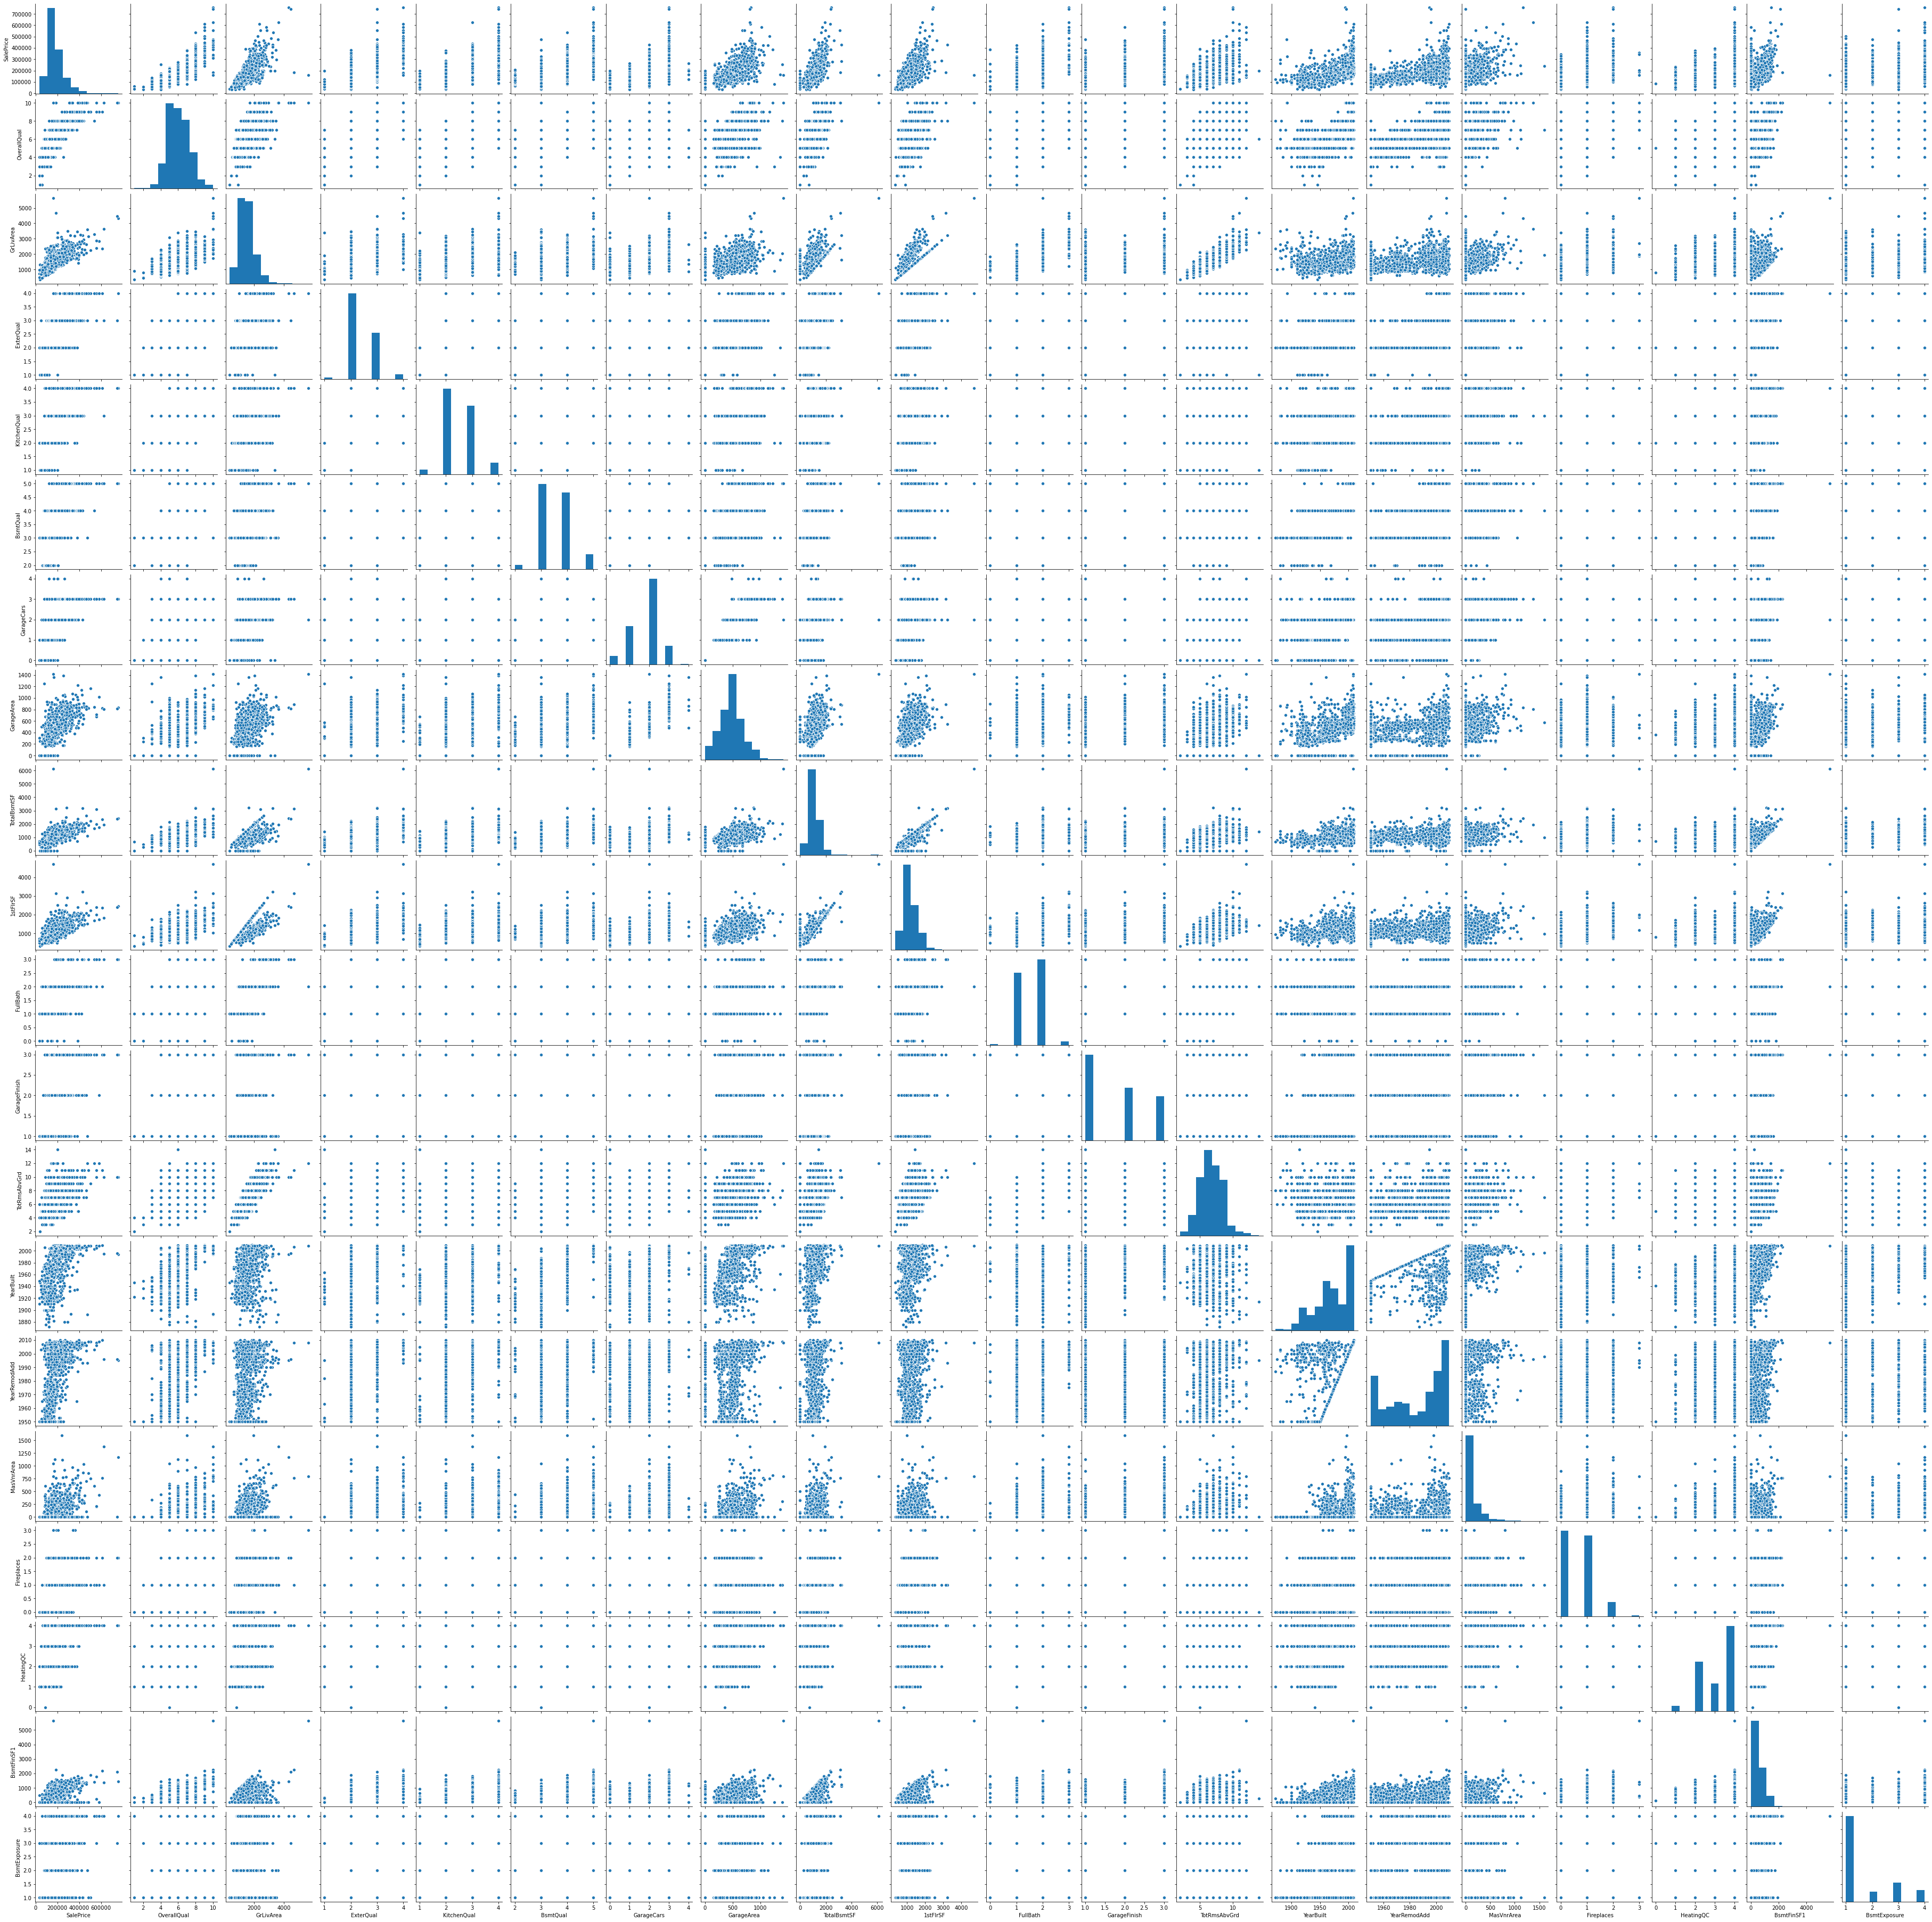

In [212]:
sns.pairplot(df[crr_lst])

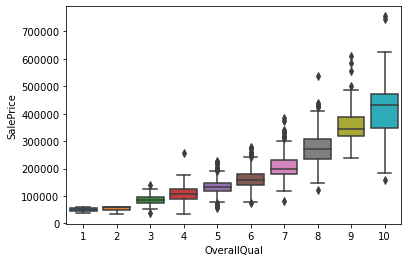

In [213]:
#SalePriceis & OverallQual
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)

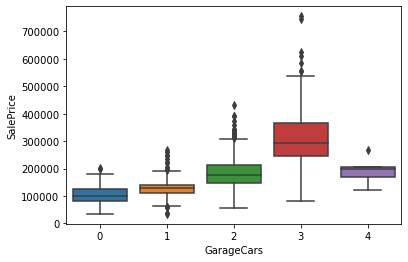

In [214]:
#SalePriceis & GarageCars
data = pd.concat([df['SalePrice'], df['GarageCars']], axis=1)
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data)

In [215]:
#Checking Descriptive statistics
df.describe([0.25,0.50,0.75,0.99])

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,1.942466,0.062329,6.099315,5.575342,1971.267808,1984.865753,103.685262,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.409156,0.276232,1.382997,1.112799,30.202904,20.645407,180.569112,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,0.000000,0.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,3.000000,0.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,3.000000,0.000000,7.000000,6.000000,2000.000000,2004.000000,164.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,190.000000,137.410000,37567.640000,3.000000,1.000000,10.000000,9.000000,2009.000000,2009.000000,791.280000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,190.000000,313.000000,215245.000000,3.000000,2.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


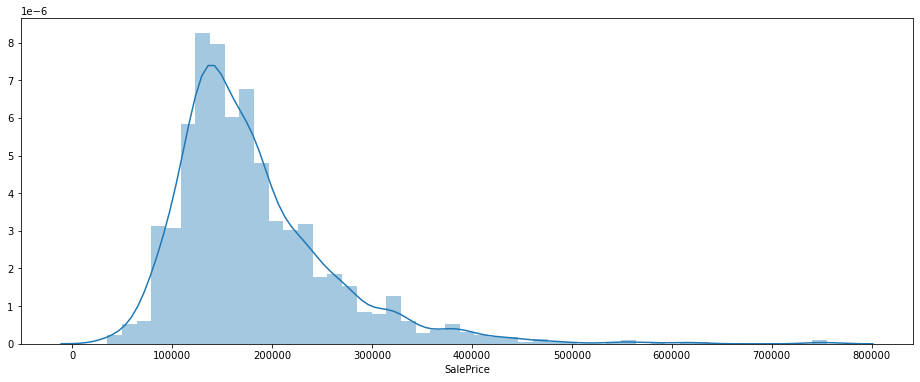

In [216]:
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

#### According to the above graphs and table we find outliers in the dataset which are treated below

In [217]:
num_col = list(df.dtypes[df.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def removeOutliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df = removeOutliers(df)

#### the distribution is checked again after scaling dataset.

### Creating Dummy Variebles (One Hot Encoding)

In [218]:
dummy = df[all_obj_colm]
dummy = pd.get_dummies(dummy,drop_first=True )
dummy.head(3)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [219]:
# Joining dummy variables dataframe to master dataframe
df=pd.concat([dummy, df], axis=1)

In [220]:
#dropping original object type collumns those have converted to dummy variables
df.drop(all_obj_colm, axis=1, inplace=True)

### Splitting the Data into Training and Testing Sets

In [221]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape, df_test.shape)

(1008, 201) (433, 201)


### Rescaling the Features

In [222]:
scaler = MinMaxScaler()

In [223]:
# Apply scaler() to all the columns except the 'dummy' variables. So the list 'all_cont_colm' is used.
df_train[all_cont_colm] = scaler.fit_transform(df_train[all_cont_colm])

In [224]:
df_train[all_cont_colm]

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
106,0.058824,0.133562,0.136767,1.0,0.0,0.333333,0.750,0.094891,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000,0.0,0.346154,0.636364,0.25,0.110320
1305,0.000000,0.297945,0.170930,0.0,0.0,0.888889,0.500,0.978102,0.950000,0.187500,...,0.471412,0.186472,0.000000,0.0,0.000,0.0,0.000000,0.909091,0.75,0.491612
756,0.235294,0.160959,0.136321,0.0,0.0,0.777778,0.500,0.985401,0.950000,0.000000,...,0.168028,0.191956,0.000000,0.0,0.000,0.0,0.000000,0.272727,0.75,0.300119
826,0.147059,0.099315,0.069535,1.0,0.0,0.444444,0.625,0.379562,0.000000,0.000000,...,0.000000,0.000000,0.351515,0.0,0.000,0.0,0.000000,0.363636,0.50,0.126419
426,0.352941,0.164384,0.165561,1.0,0.5,0.666667,0.500,0.854015,0.650000,0.090625,...,0.093349,0.000000,0.000000,0.0,0.825,0.0,0.000000,0.636364,0.75,0.406880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,0.000000,0.184932,0.121651,1.0,0.0,0.555556,0.625,0.627737,0.133333,0.151875,...,0.000000,0.000000,0.833333,0.0,0.000,0.0,0.384615,0.272727,0.25,0.208439
53,0.000000,0.160959,0.705014,0.0,0.0,0.888889,0.500,0.795620,0.616667,0.000000,...,1.000000,0.131627,0.000000,0.0,0.000,0.0,0.000000,0.909091,0.00,0.593289
356,0.000000,0.164384,0.114424,0.0,0.0,0.555556,0.625,0.875912,0.700000,0.066250,...,0.140023,0.047532,0.000000,0.0,0.000,0.0,0.000000,0.545455,0.75,0.234028
79,0.176471,0.133562,0.131585,1.0,0.0,0.444444,0.625,0.277372,0.516667,0.000000,...,0.086348,0.000000,0.387879,0.0,0.000,0.0,0.000000,0.363636,0.75,0.127267


In [225]:
df_test[all_cont_colm] = scaler.transform(df_test[all_cont_colm])

In [226]:
df_test[all_cont_colm]

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
218,0.176471,0.164384,0.206735,0.0,0.0,0.666667,1.000,0.489051,0.933333,0.19500,...,0.000000,0.217550,0.454545,0.0,0.0,0.0,0.000000,0.363636,0.50,0.468734
30,0.294118,0.099315,0.103655,1.0,0.0,0.333333,0.375,0.350365,0.000000,0.00000,...,0.000000,0.098720,0.521212,0.0,0.0,0.0,0.000000,0.545455,0.50,0.008643
548,0.000000,0.095890,0.099840,0.0,0.0,0.444444,0.750,0.605839,0.750000,0.00000,...,0.163361,0.091408,0.000000,0.0,0.0,0.0,0.000000,0.454545,0.50,0.152686
634,0.411765,0.147260,0.081758,1.0,0.0,0.555556,0.500,0.788321,0.500000,0.00000,...,0.308051,0.102377,0.000000,0.0,0.0,0.0,0.461538,0.454545,1.00,0.184884
1362,0.176471,0.164384,0.161429,0.0,0.0,0.333333,0.375,0.350365,0.950000,0.00000,...,0.064177,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.454545,0.75,0.118624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0.235294,0.202055,0.131311,1.0,0.0,0.666667,0.500,0.846715,0.633333,0.02625,...,0.266044,0.120658,0.472727,0.0,0.0,0.0,0.384615,0.181818,1.00,0.273852
522,0.176471,0.099315,0.053267,1.0,0.0,0.555556,0.750,0.547445,0.000000,0.00000,...,0.000000,0.043876,0.109091,0.0,0.0,0.0,0.000000,0.818182,0.00,0.210303
160,0.000000,0.164384,0.141374,0.0,0.0,0.555556,0.625,0.817518,0.566667,0.00000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.454545,0.50,0.216235
453,0.235294,0.184932,0.110854,1.0,0.0,0.777778,0.500,0.992701,0.966667,0.00000,...,0.000000,0.054845,0.000000,0.0,0.0,0.0,0.000000,0.454545,0.75,0.296729


### Checking the distribution of target variable

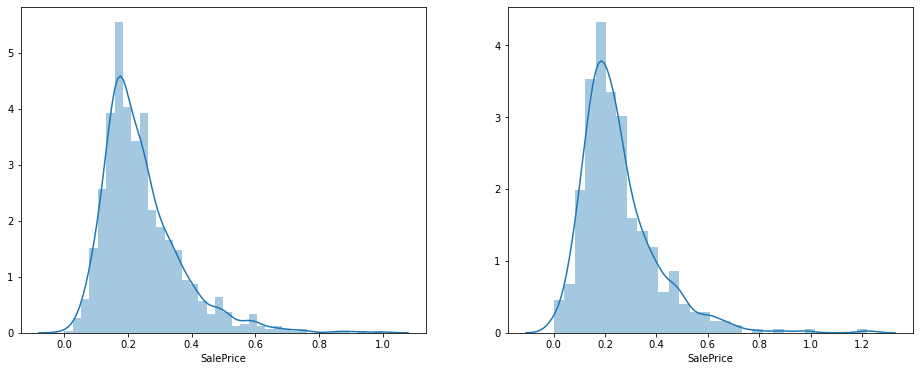

In [227]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

### Dividing into X and Y sets for the model building

In [228]:
# spliting df_train into y_train & X_train
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

### Feature Selection

In [229]:
# Running RFE with the output number of the variable equal to 30
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [230]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSZoning_FV', False, 19),
 ('MSZoning_RH', False, 21),
 ('MSZoning_RL', False, 22),
 ('MSZoning_RM', False, 23),
 ('Street_Pave', False, 145),
 ('LandContour_HLS', False, 90),
 ('LandContour_Low', False, 79),
 ('LandContour_Lvl', False, 175),
 ('Utilities_NoSeWa', False, 15),
 ('LotConfig_CulDSac', False, 92),
 ('LotConfig_FR2', False, 161),
 ('LotConfig_FR3', False, 125),
 ('LotConfig_Inside', False, 149),
 ('Neighborhood_Blueste', False, 115),
 ('Neighborhood_BrDale', False, 120),
 ('Neighborhood_BrkSide', False, 82),
 ('Neighborhood_ClearCr', False, 104),
 ('Neighborhood_CollgCr', False, 102),
 ('Neighborhood_Crawfor', False, 43),
 ('Neighborhood_Edwards', False, 103),
 ('Neighborhood_Gilbert', False, 101),
 ('Neighborhood_IDOTRR', False, 150),
 ('Neighborhood_MeadowV', False, 85),
 ('Neighborhood_Mitchel', False, 99),
 ('Neighborhood_NAmes', False, 105),
 ('Neighborhood_NPkVill', False, 48),
 ('Neighborhood_NWAmes', False, 98),
 ('Neighborhood_NoRidge', False, 33),
 ('Neighborho

In [231]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_].tolist()
col

['Exterior1st_CBlock',
 'Exterior1st_Stone',
 'Exterior2nd_CBlock',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'Functional_Sev',
 'LotArea',
 'OverallQual',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea']

In [232]:
# The features not supported by RFE
X_train.columns[~rfe.support_]

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_NoSeWa', 'LotConfig_CulDSac',
       ...
       'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object', length=180)

In [233]:
len(col)

20

In [234]:
X_train=X_train[col]
X_test=df_test[col]

### Building a linear model L1 (Lasso) Regularisation

In [235]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8160185030328522
0.78949558256051


In [236]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSZoning_FV', -0.13),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('LandContour_HLS', -0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('Utilities_NoSeWa', 0.0),
 ('LotConfig_CulDSac', -0.0),
 ('LotConfig_FR2', 0.036),
 ('LotConfig_FR3', 0.335),
 ('LotConfig_Inside', 0.074),
 ('Neighborhood_Blueste', -0.0),
 ('Neighborhood_BrDale', 0.0),
 ('Neighborhood_BrkSide', 0.082),
 ('Neighborhood_ClearCr', 0.024),
 ('Neighborhood_CollgCr', 0.0),
 ('Neighborhood_Crawfor', -0.0),
 ('Neighborhood_Edwards', 0.261),
 ('Neighborhood_Gilbert', 0.12)]

#### Buiilding Model with GridSearchCV for optimum value of alpha

In [237]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)
hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}
model = Lasso()
model_cv = GridSearchCV(estimator = model,param_grid=hyper_param,scoring='r2',cv=folds,verbose=1,return_train_score=True
                       )
model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [238]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003289,0.001025,0.001737,0.000966,0.001,{'alpha': 0.001},0.803796,0.775970,0.789398,0.783227,...,0.819824,0.816210,0.809465,0.817969,0.817799,0.815482,0.815963,0.815850,0.816201,0.002636
1,0.000111,0.000332,0.003125,0.006250,0.010,{'alpha': 0.01},0.390244,0.302229,0.391241,0.272328,...,0.372716,0.321021,0.337757,0.382975,0.390549,0.363076,0.342333,0.364758,0.360207,0.020060
2,0.002645,0.002294,0.003326,0.004477,0.100,{'alpha': 0.1},-0.012775,-0.017739,-0.003177,-0.011958,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.005088,0.006999,0.000106,0.000319,1.000,{'alpha': 1.0},-0.012775,-0.017739,-0.003177,-0.011958,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.001815,0.004667,0.000000,0.000000,5.000,{'alpha': 5.0},-0.012775,-0.017739,-0.003177,-0.011958,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


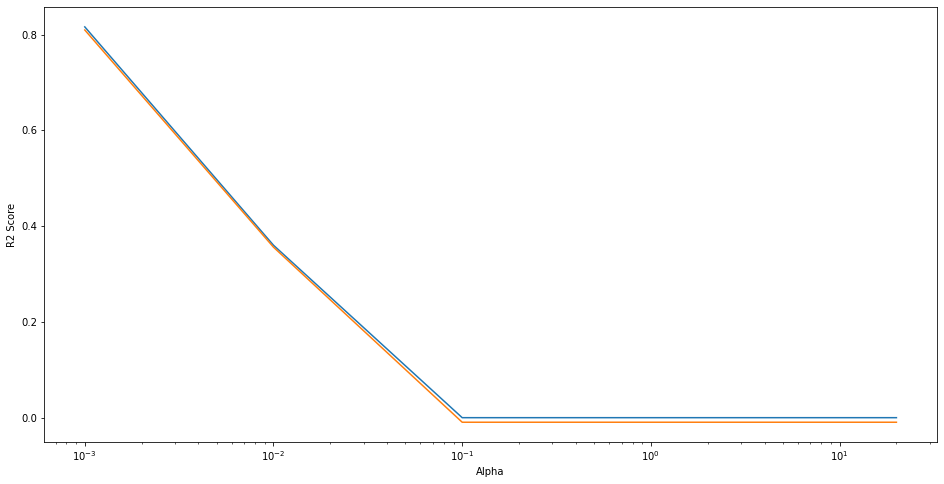

In [239]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [240]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [241]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))



0.8160185030328522
0.78949558256051


In [242]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [243]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
11,LotConfig_FR3,0.334883
19,Neighborhood_Edwards,0.261010
20,Neighborhood_Gilbert,0.120416
15,Neighborhood_BrkSide,0.081554
12,LotConfig_Inside,0.074437
10,LotConfig_FR2,0.035634
16,Neighborhood_ClearCr,0.023712
6,LandContour_Low,0.000000
7,LandContour_Lvl,-0.000000
8,Utilities_NoSeWa,0.000000


### Calculating some metrics such as R2 score, RSS and RMSE

In [244]:

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8368065394515584
0.7858673799839783
2.550977070342958
2.0398423400869583
0.0025307312205783317
0.004710952286574962


### Building a linear model L2 (Ridge ) Regularisation

In [245]:
ridge = Ridge(alpha=0.4)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8365620624367285
0.7858831858288889


#### Here alpha is not much good as the differecne is 5.1. So we need to find the optimum value of alpha using GridSearchCV

In [246]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)
hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}
model = Ridge()
model_cv = GridSearchCV(estimator=model,param_grid=hyper_param,scoring='r2',cv=folds,verbose=1,return_train_score=True)
model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [247]:

cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003308,0.001060,0.001888,0.000470,0.001,{'alpha': 0.001},0.785537,0.821715,0.801949,0.815599,...,0.839751,0.839852,0.831187,0.836555,0.836388,0.836621,0.837244,0.836476,0.837269,0.002532
1,0.003081,0.000686,0.001669,0.000588,0.010,{'alpha': 0.01},0.785618,0.821689,0.802021,0.815585,...,0.839751,0.839851,0.831187,0.836554,0.836388,0.836621,0.837244,0.836476,0.837269,0.002532
2,0.003348,0.000709,0.001851,0.000601,0.100,{'alpha': 0.1},0.786269,0.821417,0.802678,0.815431,...,0.839714,0.839813,0.831152,0.836540,0.836353,0.836586,0.837210,0.836441,0.837235,0.002530
3,0.003667,0.001354,0.001984,0.000784,0.200,{'alpha': 0.2},0.786732,0.821105,0.803306,0.815236,...,0.839620,0.839714,0.831062,0.836499,0.836266,0.836496,0.837122,0.836352,0.837148,0.002526
4,0.003597,0.001102,0.001842,0.000447,0.500,{'alpha': 0.5},0.787216,0.820124,0.804697,0.814523,...,0.839142,0.839211,0.830602,0.836253,0.835830,0.836035,0.836673,0.835903,0.836704,0.002508


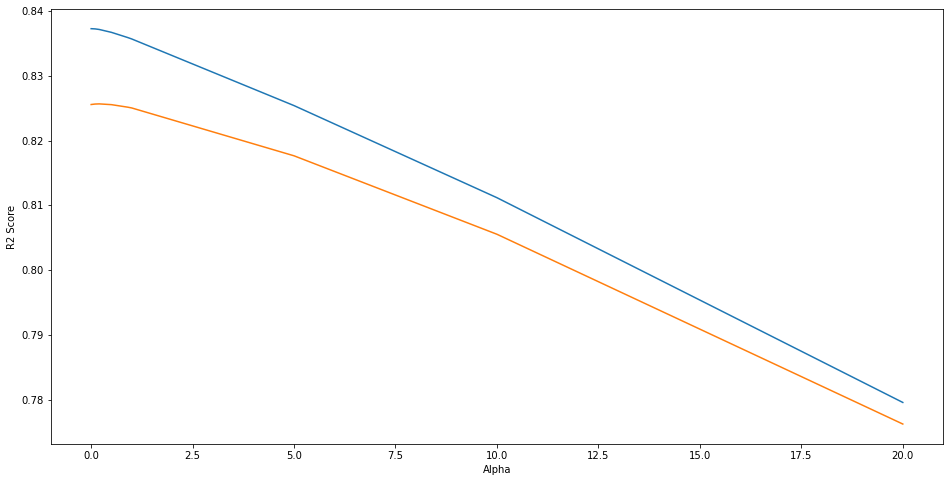

In [248]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

In [249]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.2}

In [250]:
ridge = Ridge(alpha = 0.2)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8368065394515584
0.7858673799839783


In [251]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [252]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
11,LotConfig_FR3,0.343687
10,LotConfig_FR2,0.162228
20,Neighborhood_Gilbert,0.118781
19,Neighborhood_Edwards,0.115013
12,LotConfig_Inside,0.108075
17,Neighborhood_CollgCr,0.098795
16,Neighborhood_ClearCr,0.097426
15,Neighborhood_BrkSide,0.093713
8,Utilities_NoSeWa,0.079038
14,Neighborhood_BrDale,0.037960


### Calculating some metrics such as R2 score, RSS and RMSE

In [253]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8160185030328522
0.78949558256051
2.875927617156276
2.005279828156416
0.002853102794797893
0.004631131242855464


### Metrics Table 

In [263]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        
        }



rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric.drop("Linear Regression",axis=1, inplace=True)
final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.836807,0.816019
1,R2 Score (Test),0.785867,0.789496
2,RSS (Train),2.550977,2.875928
3,RSS (Test),2.039842,2.005280
4,MSE (Train),0.050306,0.053414
5,MSE (Test),0.068636,0.068052


### Though two models yield the outcomes without big differences, Lasso is preferred over Ridge as it penalize more on dataset and also it performs the job of feature elimination.

In [255]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8160185030328522
0.78949558256051


#### After compairing both the models, It can be concluded that the below Features are best explaining the DataSet

In [256]:
#LotConfig_FR3 (Model Coef.	 0.334883)
#Neighborhood_Edwards (Model Coef.	 0.261010)
#MSZoning_FV	 (Model Coef.	 -0.129844)
#Neighborhood_Gilbert (Model Coef.	 0.120416)
#Neighborhood_BrkSide (Model Coef.	 0.081554)

#### Best alpha value for Lasso : {'alpha': 0.001}
#### Best alpha value for Ridge : {'alpha': 0.2}